# Flights Data Exploration

This is based on the Microsoft ML Basics notebook. The notebook can be found [here](https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/01%20-%20Flights%20Challenge.ipynb).

In [1]:
import pandas as pd

df_flights = pd.read_csv('datasets/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Clean the data
- Identify any null or missing data, and impute appropriate replacement values.
- Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

### Handle missing data

In [2]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

There are missing values in the "DepDel15" column. This column denotes flights whos departure was delayed by more than 15 minutes and thus considered "late".  
As the value of this column is directly linked to the "DepDelay" column (number of minutes the flights departure was delayed), we can use these values to impute the correct values into the DepDel15 column.

Let us take a look at a few columns with missing values:

In [3]:
df_missing_values = df_flights[df_flights.DepDel15.isnull()]
# Alternatively: df_flights[df_flights.isnull().any(axis=1)], but as we know that only DepDel15 has null values we can use the above version.

df_missing_values

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [4]:
df_missing_values.DepDelay.value_counts()

0    2761
Name: DepDelay, dtype: int64

All the flights with missing DepDel15 have a departure delay of zero minutes. Thus we can now just impute a 0 into all thoese rows.

In [5]:
df_flights.DepDel15 = df_flights['DepDel15'].fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Identify and eliminate any outliers in the DepDelay and ArrDelay columns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_flights[['DepDelay', 'ArrDelay']].describe()  # equivalent to df_flights.loc[:, ['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


A plane leaving or arriving about an hour to 70 minutes early seems possible, but arriving or departureing (almost) a day late?  
Let's take a look at all the "high delay" flights:

In [8]:
df_flights[(df_flights['DepDelay'] > 1000) | (df_flights['ArrDelay'] > 1000)][['DepDelay', 'ArrDelay']]

,DepDelay,ArrDelay
6537,1172,1175
32883,1320,1301
95648,1158,1172
121919,1305,1440
180503,1425,1429
214288,1091,1114
241527,1281,1267
251813,1386,1394
255631,1366,1348


DepDelay
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



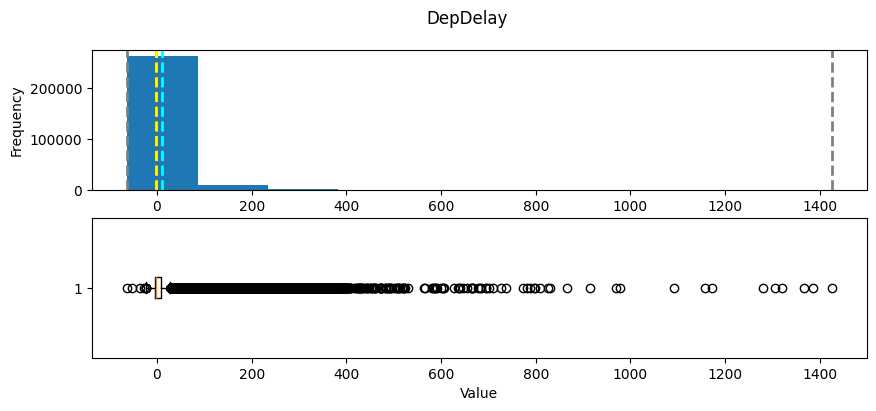

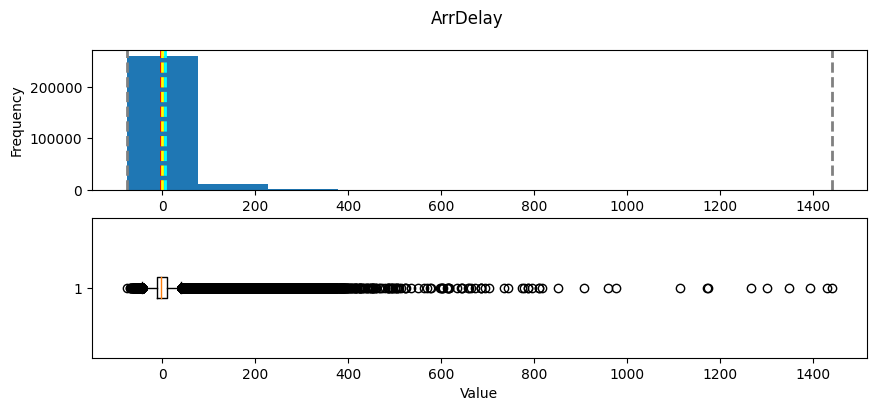

In [9]:
def show_distribution(var_data):
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f'{var_data.name}\nMinimum:{min_val:.2f}\nMean:{mean_val:.2f}\nMedian:{med_val:.2f}\nMode:{mod_val:.2f}\nMaximum:{max_val:.2f}\n')

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



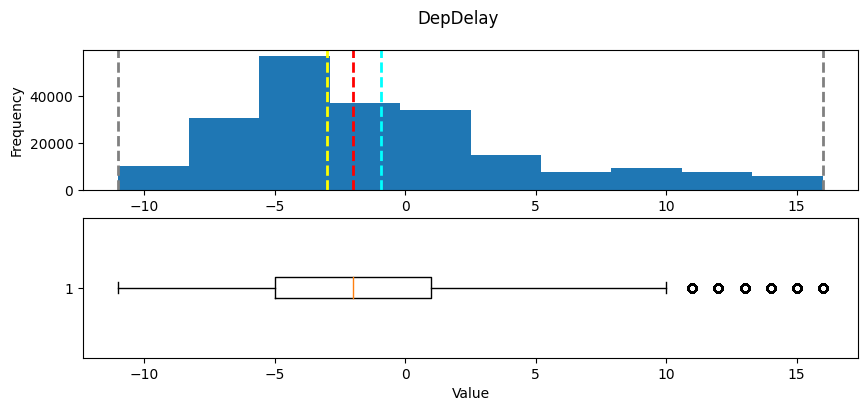

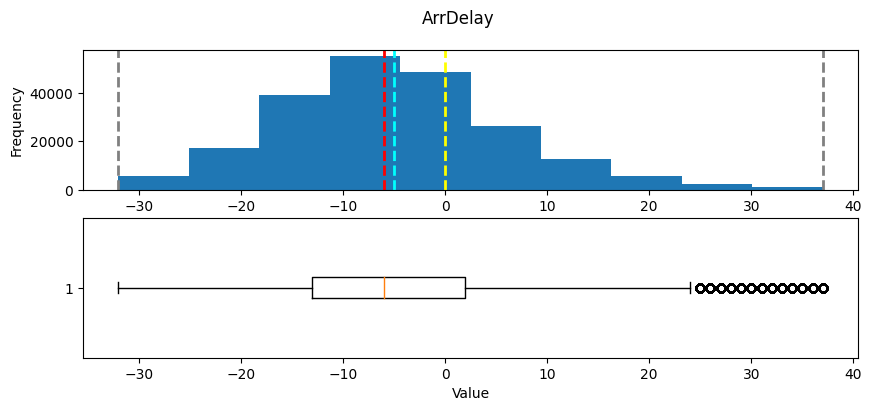

In [10]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)

df_flights = df_flights[df_flights['ArrDelay'] > ArrDelay_01pcntile]
df_flights = df_flights[df_flights['ArrDelay'] < ArrDelay_90pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)

df_flights = df_flights[df_flights['DepDelay'] > DepDelay_01pcntile]
df_flights = df_flights[df_flights['DepDelay'] < DepDelay_90pcntile]

for col in delayFields:
    show_distribution(df_flights[col])

## Explore the (cleaned) data

In [11]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


There seem to be no flights at all during the months from November to March!

### What are the average (mean) departure and arrival delays?

In [12]:
df_flights[delayFields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

In [29]:
df_flights.groupby('Carrier').ArrDelay.mean()

Carrier
9E   -7.496322
AA   -5.879219
AS   -3.583845
B6   -5.810046
DL   -6.611133
EV   -6.813485
F9   -0.502527
FL   -3.954649
HA   -2.285384
MQ   -4.303297
OO   -4.289238
UA   -7.606653
US   -3.911790
VX   -5.303501
WN   -2.884136
YV   -3.818073
Name: ArrDelay, dtype: float64

In [20]:
df_flights.groupby('Carrier').ArrDelay.median()

Carrier
9E   -9.0
AA   -7.0
AS   -4.0
B6   -7.0
DL   -8.0
EV   -8.0
F9   -1.0
FL   -5.0
HA   -3.0
MQ   -5.0
OO   -5.0
UA   -9.0
US   -5.0
VX   -6.0
WN   -4.0
YV   -4.0
Name: ArrDelay, dtype: float64

### Is there a noticable difference in arrival delays for different days of the week?

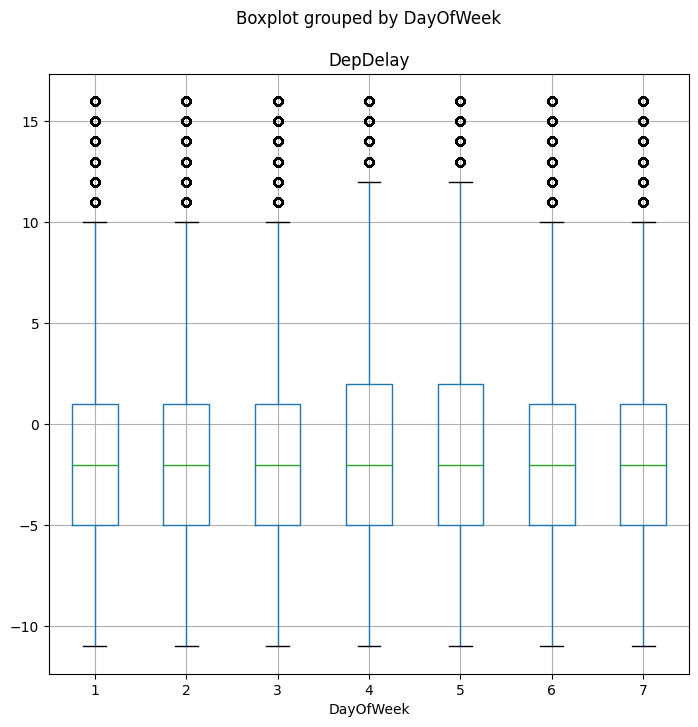

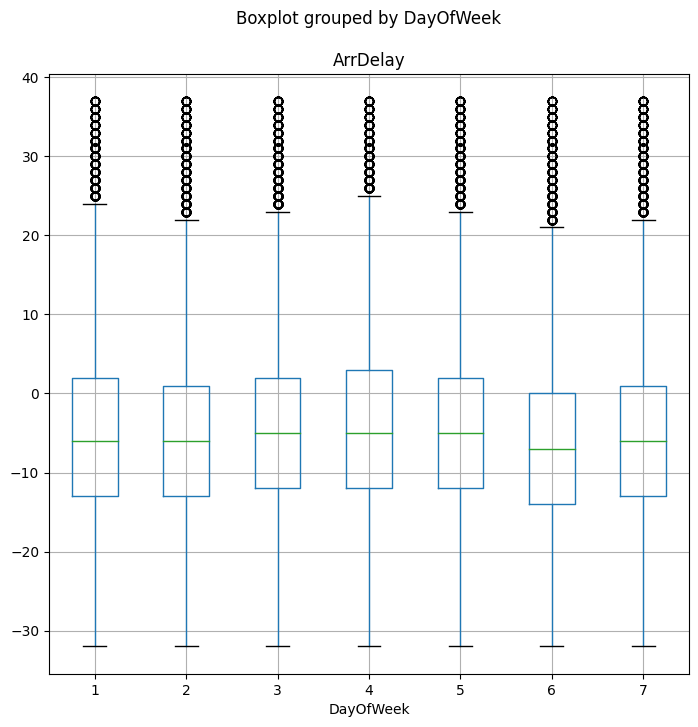

In [33]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8, 8))

### Which departure airport has the highest average departure delay?

OriginAirportName
Chicago Midway International           2.365960
Dallas Love Field                      2.148798
William P Hobby                        1.561927
Metropolitan Oakland International     0.964853
Denver International                   0.807272
                                         ...   
Memphis International                 -2.962737
Tucson International                  -2.989154
Ted Stevens Anchorage International   -3.149758
Richmond International                -3.198073
Long Beach Airport                    -3.447844
Name: DepDelay, Length: 70, dtype: float64

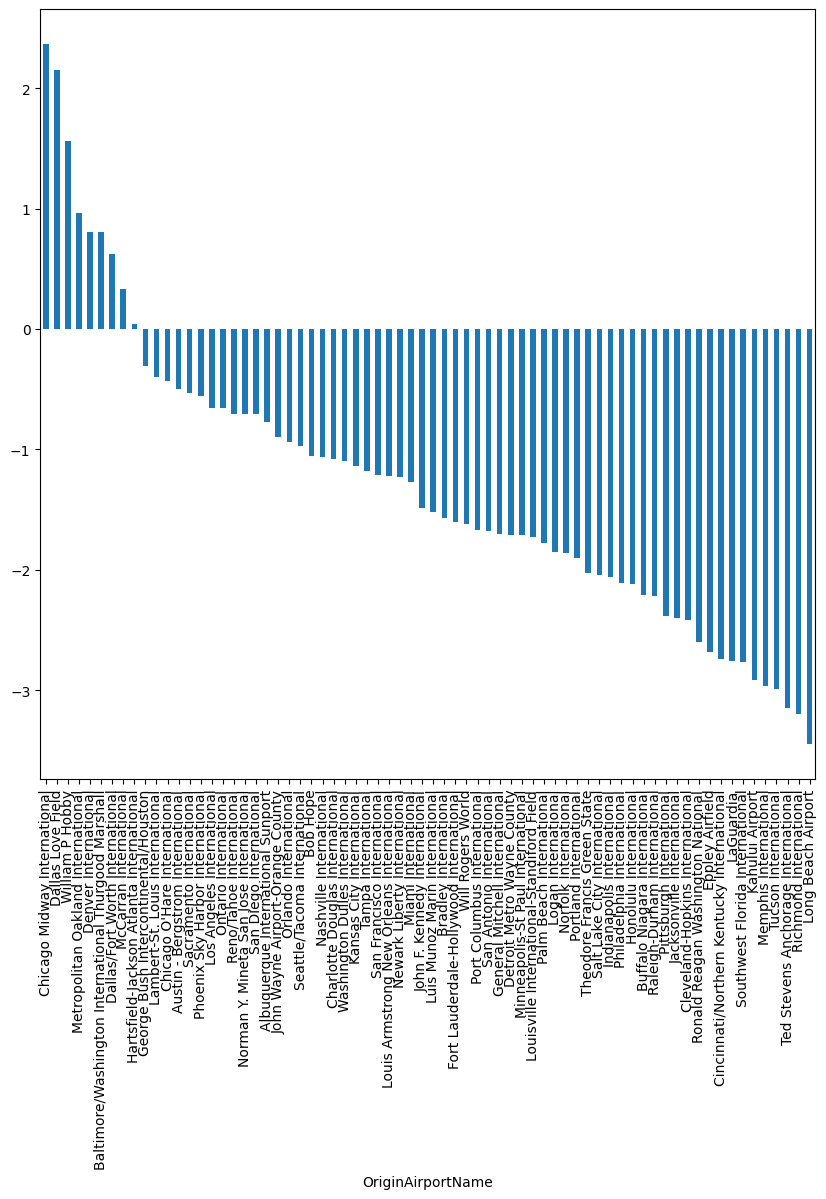

In [61]:
df_flights.groupby('OriginAirportName').DepDelay.mean().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))
df_flights.groupby(df_flights.OriginAirportName)['DepDelay'].mean().sort_values(ascending=False)

# A clearer alternative:
# df_by_airport = df_flights.groupby(df_flights.OriginAirportName)
# mean_delay_by_airport = pd.DataFrame(df_by_airport['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
# mean_delay_by_airport.plot(kind="bar", figsize=(10, 10))
# mean_delay_by_airport

### Do late (>15 minutes of delay) departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

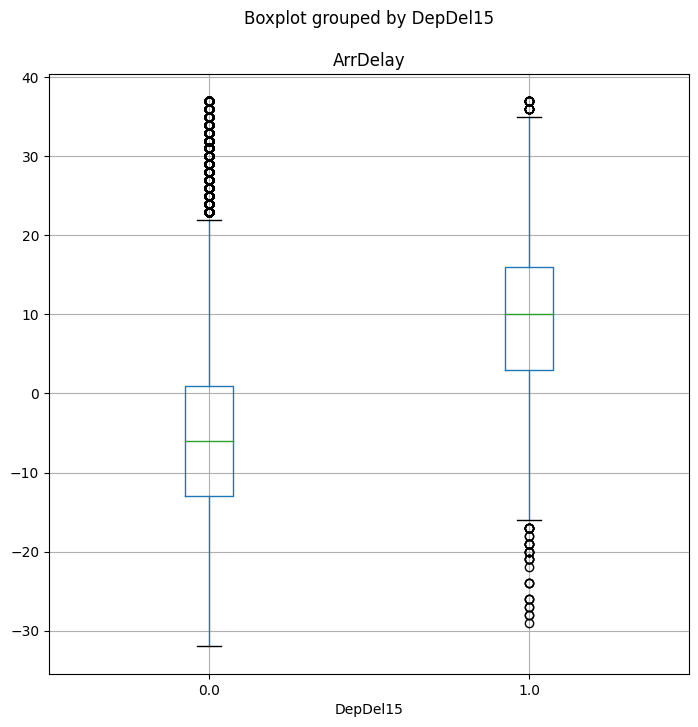

In [70]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(8, 8))

### Which route (from origin airport to destination airport) has the most late arrivals?

In [86]:
routes = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights.DestAirportName)
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

In [92]:
df_arr_del_by_airport = pd.DataFrame(df_flights.groupby('Route').ArrDel15.sum().sort_values(ascending=False))
df_arr_del_by_airport  # I would like to plot this as a bar chart, but as there are 2479 rows this data is not made to be plotted

,ArrDel15
Route,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


<AxesSubplot: xlabel='Route'>

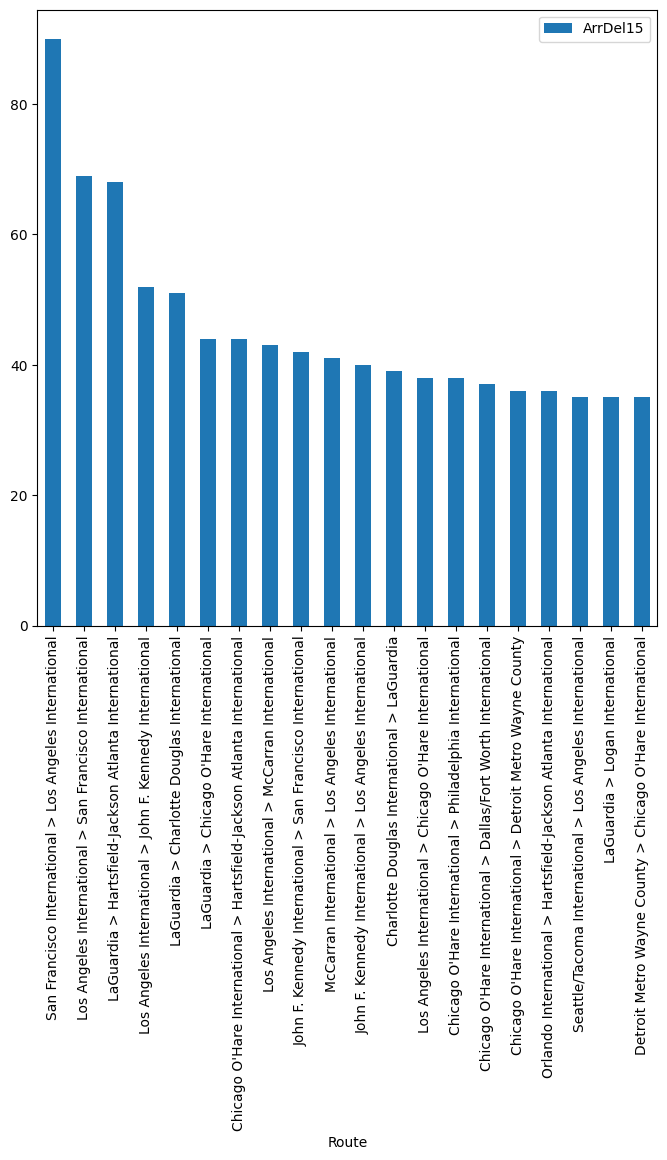

In [104]:
# As there are 2479 rows in the resulting table, we will just plot the 20 routes with the most average delay
df_arr_del_by_airport.head(20).plot(kind="bar", figsize=(8, 8))

### Which route has the highest average arrival delay?

In [117]:
df_flights.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)
# Alternatively:
# pd.DataFrame(df_flights.groupby('Route')['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

Route
Louis Armstrong New Orleans International > Ronald Reagan Washington National    24.500000
Cleveland-Hopkins International > Palm Beach International                       18.000000
John F. Kennedy International > Louisville International-Standiford Field        18.000000
Cleveland-Hopkins International > Philadelphia International                     12.800000
Memphis International > Denver International                                      9.758621
                                                                                   ...    
Lambert-St. Louis International > Cleveland-Hopkins International               -20.000000
Eppley Airfield > LaGuardia                                                     -20.750000
Denver International > Kahului Airport                                          -22.666667
Jacksonville International > Chicago Midway International                       -24.125000
Indianapolis International > Logan International                                -26.